In [57]:
import numpy as np
from matplotlib import pyplot as plt

F = [[1,0],[2,0],[0,-1],[1,-1],[1,-2]]
G = [[0,0],[1,0],[1,-1],[1,-2],[2,-1]]
I = [[0,0],[0,-1],[0,-2],[0,-3],[0,-4]]
L = [[0,0],[0,-1],[0,-2],[0,-3],[1,-3]]
J = [[1,0],[1,-1],[1,-2],[1,-3],[0,-4]]
N = [[1,0],[0,-1],[1,-1],[0,-2],[0,-3]]
M = [[0,0],[0,-1],[1,-1],[1,-2],[1,-3]]
P = [[0,0],[1,0],[0,-1],[1,-1],[0,-2]]
Q = [[0,0],[1,0],[0,-1],[1,-1],[1,-2]]
T = [[0,0],[1,0],[2,0],[1,-1],[1,-2]]
U = [[0,0],[0,-1],[3,0],[1,-1],[2,-1]]
V = [[0,0],[0,-1],[0,-2],[1,-2],[2,-2]]
W = [[0,0],[0,-1],[1,-1],[1,-2],[2,-2]]
X = [[1,0],[0,-1],[1,-1],[1,-2],[2,-1]]
Z = [[0,0],[1,0],[1,-1],[1,-2],[2,-2]]
S = [[1,0],[2,0],[1,-1],[1,-2],[0,-2]]
Y = [[1,0],[0,-1],[1,-1],[1,-2],[1,-3]]
A = [[0,0],[0,-1],[0,-2],[0,-3],[1,-1]]

points = {}
input_translation = {
    "F" : F,
    "G" : G,
    "I" : I,
    "L" : L,
    "J" : J,
    "N" : N,
    "M" : M,
    "P" : P,
    "Q" : Q,
    "T" : T,
    "U" : U,
    "V" : V,
    "W" : W,
    "Z" : Z,
    "S" : S,
    "Y" : A,
    
}
    
colours = ["R","B"]
def neighbors(coord):
    adjacent = []
    x,y= coord
    adjacent.append([x,y+1])
    adjacent.append([x+1,y])
    adjacent.append([x,y-1])
    adjacent.append([x-1,y])
    return adjacent

def place_shape(shape,base_coord,points,marker):
    shape_points = np.array(shape) + np.array(base_coord)
    for point in shape_points:
        points[tuple(point)] = marker
        # grid[point[0]][point[1]] = marker
    return points
        
def check_valid(shape_1,shape_2):
    for point in shape_1:
        if point in shape_2:
            return False
    for point in shape_1:
        adj = neighbors(point)
        for neighbor in adj:
            if tuple(neighbor) in shape_2:
                return True
    return False

def plot_shape(points):
    for point in points:
        x,y = point
        plt.scatter(x,y)

def fuse_points(shape_1,shape_2):
    master_points = {}
    for point in shape_1:
        master_points[point] = 1
    for point in shape_2:
        master_points[point] = 1
    return master_points

def secondelem(a):
    return [a[1],a[0]]

def normalize(grid):
    def secondelem(a):
        return a[1]
    points = [point for point in grid.keys()]
    points = sorted(sorted(points,key=secondelem))
    base_coord = points[0]
    normalize_op =  np.array([0,0]) - np.array(base_coord)
    points = np.array(points) + normalize_op
    points = [list(point) for point in points]
    return points

print("NAME: VICTOR SIM")
print("YEAR: 11")
print("SCHOOL: WICHESTER COLLEGE")
valid = 0
configs = []
original =[]
for x_1 in range(-12,13):
    shape_1 = place_shape(L,[0,0],{},1)
    for y_1 in range(-12,13):
        shape_2 = place_shape(I,[x_1,y_1],{},2)
        for x_2 in range(-12,13):
            for y_2 in range(-12,13):
                shape_3 = place_shape(V,[x_2,y_2],{},3)
                if (check_valid(shape_1,shape_2) and check_valid(shape_1,shape_3)) or (check_valid(shape_3,shape_2) and check_valid(shape_2,shape_1)) or (check_valid(shape_3,shape_2) and check_valid(shape_1,shape_3)):
                    grid = fuse_points(shape_1,shape_2)
                    grid = fuse_points(grid,shape_3)
                    orig = [key for key in grid.keys()]
                    grid = list(normalize(grid))
                    # print(grid,configs)
                    if not(sorted(grid) in configs):
                        configs.append(sorted(grid))
                        original.append(orig)
                        valid += 1
invalid = 0
for i in range(len(configs)):
    if len(configs[i]) != 15:
        invalid += 1
        print(i)
print(valid-invalid)

NAME: VICTOR SIM
YEAR: 11
SCHOOL: WICHESTER COLLEGE
100
106
107
110
111
112
118
119
120
135
136
141
142
145
146
147
152
153
154
155
170
171
172
176
177
180
181
182
186
187
188
189
190
205
206
207
208
212
215
216
219
220
221
222
223
224
239
240
241
242
246
249
250
251
254
255
256
257
258
259
274
275
276
279
280
283
284
287
288
289
290
291
308
309
312
313
314
318
321
322
323
324
343
346
347
348
352
353
356
357
358
393
394
398
399
400
403
404
411
412
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
479
480
484
485
486
489
490
525
526
527
531
532
535
536
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
583
584
585
590
591
594
595
596
599
600
601
602
617
618
624
625
628
629
630
633
634
635
636
652
659
660
663
664
665
668
669
670
671
708
711
712
716
721
722
723
741
742
745


In [17]:
shape_1 = place_shape(I,[0,0],{},1)
shape_2 = place_shape(I,[1,0],{},2)
shape_3 = place_shape(I,[2,0],{},3)
print(check_valid(shape_1,shape_2),check_valid(shape_1,shape_3),check_valid(shape_3,shape_2))

True False True


In [2]:
grid = np.zeros((10,10))
def plot_shape(shape):
    for square in shape:
        plt.scatter(square[0],square[1])
    plt.show()

In [53]:
import time
from IPython.display import clear_output

invalid = 0
for i in range(len(configs)):
    if len(configs[i]) != 15:
        invalid += 1
        print(i)
print(invalid)

91
92
93
94
95
104
105
106
107
108
109
110
111
112
119
120
121
122
123
124
125
126
127
132
133
134
135
136
137
138
139
140
143
144
145
146
147
148
149
150
151
154
155
156
157
158
159
160
161
164
165
166
167
168
169
172
173
174
175
178
179
183
62


In [54]:
configs[91]

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8]]

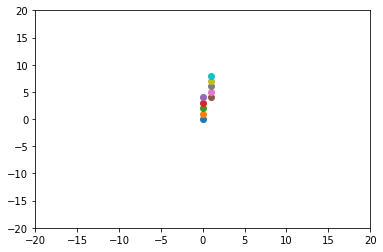

In [55]:
plt.xlim([-20, 20])
plt.ylim([-20 , 20])
plot_shape(configs[91])

In [29]:
configs[1]

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11]]